In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 

In [3]:
age_raw = 'Resources/Age_Data.csv'
age_data = pd.read_csv(age_raw)
age_data.head()

,Unnamed: 0,Year,City,Age Range,Number in Range
0,0,2018,"Albany, NY",18 to 24 Years,21091
1,1,2018,"Albany, NY",75 Years & Over,5906
2,2,2018,"Albany, NY",45 to 54 Years,10514
3,3,2018,"Albany, NY",Under 5 Years,5491
4,4,2018,"Albany, NY",65 to 74 Years,6670


In [4]:
income_raw = 'Resources/Income_data.csv'
income_data = pd.read_csv(income_raw)
income_data = income_data[['Year', 'City', 'Median Income']]
income_data.head()

,Year,City,Median Income
0,2018,"Albany, NY",45500
1,2017,"Albany, NY",43790
2,2016,"Albany, NY",42335
3,2015,"Albany, NY",40949
4,2014,"Albany, NY",41099


In [5]:
avacado_raw = 'Resources/clean_avocado.csv'
avacado_data = pd.read_csv(avacado_raw)
avacado_data['region'].unique()

array(['Albany', 'Atlanta', 'Boise', 'Boston', 'California', 'Charlotte',
       'Chicago', 'Columbus', 'Denver', 'Detroit', 'Grand Rapids',
       'Great Lakes', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Midsouth', 'Nashville',
       'New York', 'Northern New England', 'Orlando', 'Philadelphia',
       'Pittsburgh', 'Plains', 'Portland', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'Spokane', 'St. Louis', 'Syracuse', 'Tampa'], dtype=object)

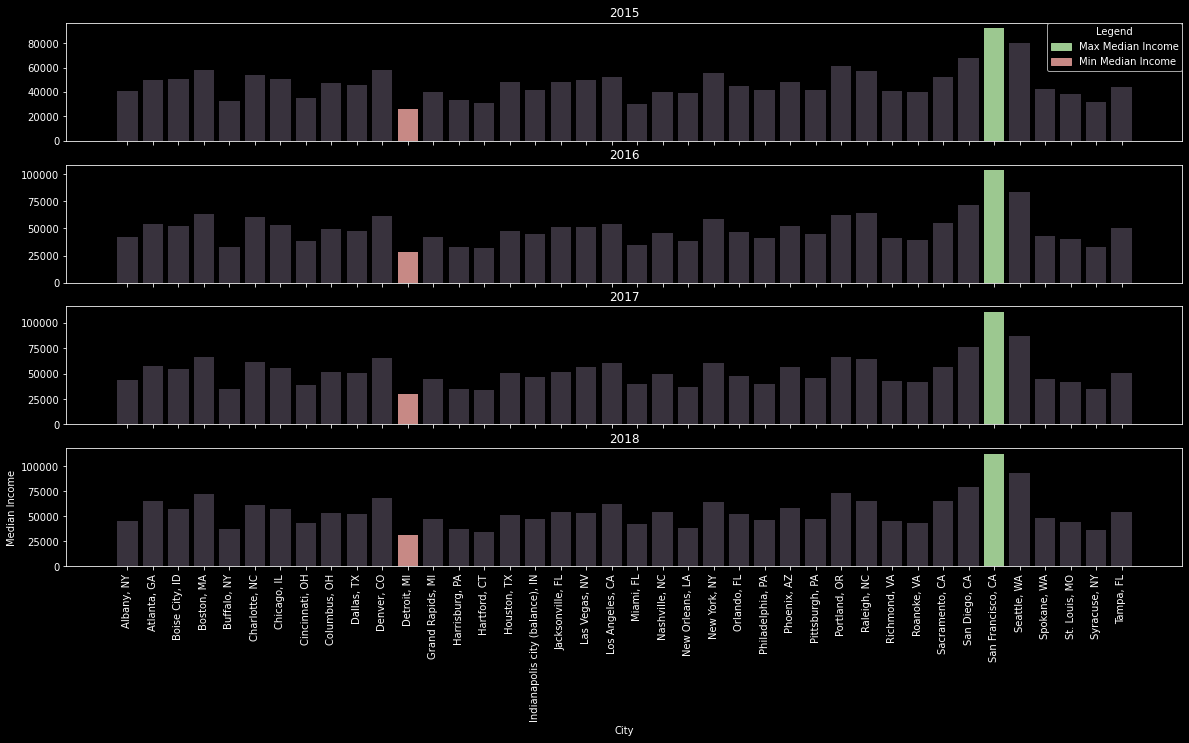

In [133]:
import matplotlib.patches as mpatches

#setup Groupbys, max, and min
income_groupby = income_data.copy().loc[income_data['Year'] >= 2015]
income_groupby = income_groupby.groupby(['Year', 'City', 'Median Income']).sum().reset_index().pivot(index='City', columns='Year').reset_index()
income_groupby.columns = ['City', '2015','2016', '2017', '2018']

income_max = income_data.copy().loc[income_data['Year'] >= 2015]
income_max = income_max.drop_duplicates().groupby(['Year'])['Median Income'].max().reset_index()
income_max = pd.merge(income_max, income_data.copy(), on=['Year', 'Median Income'], how='left').drop_duplicates().pivot(index='City', columns='Year').reset_index()
income_max.columns = ['City', '2015','2016', '2017', '2018']

income_min = income_data.copy().loc[income_data['Year'] >= 2015]
income_min = income_min.drop_duplicates().groupby(['Year'])['Median Income'].min().reset_index()
income_min = pd.merge(income_min, income_data.copy(), on=['Year', 'Median Income'], how='left').drop_duplicates().pivot(index='City', columns='Year').reset_index()
income_min.columns = ['City', '2015','2016', '2017', '2018']

#make plot fig
plt.rcParams['figure.figsize']=(20,10)
#set axis
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)
#plot axis
ax1.bar(income_groupby['City'], income_groupby['2015'], color='#71647A', alpha=.5)
ax1.bar(income_max['City'], income_max['2015'], color = '#9CC890')
ax1.bar(income_min['City'], income_min['2015'], color= '#C78985')
ax1.set_title('2015')

ax2.bar(income_groupby['City'], income_groupby['2016'], color='#71647A', alpha=.5)
ax2.bar(income_max['City'], income_max['2016'], color = '#9CC890')
ax2.bar(income_min['City'], income_min['2016'],color= '#C78985')
ax2.set_title('2016')

ax3.bar(income_groupby['City'], income_groupby['2017'], color='#71647A', alpha=.5)
ax3.bar(income_max['City'], income_max['2017'], color = '#9CC890')
ax3.bar(income_min['City'], income_min['2017'],color= '#C78985')
ax3.set_title('2017')

ax4.bar(income_groupby['City'], income_groupby['2018'], color='#71647A', alpha=.5)
ax4.bar(income_max['City'], income_max['2018'], color = '#9CC890')
ax4.bar(income_min['City'], income_min['2018'],color= '#C78985')
ax4.set_title('2018')

#legend, formatting, etc.
max_patch = mpatches.Patch(color='#9CC890', label='Max Median Income')
min_patch = mpatches.Patch(color='#C78985', label='Min Median Income')
ax1.legend(title='Legend', handles = [max_patch, min_patch], loc='upper right', fancybox=True, borderaxespad=0)

plt.ylabel('Median Income')
plt.xlabel('City')
plt.xticks( rotation=90)

plt.show()

In [68]:
income_max = income_data.copy().loc[income_data['Year'] >= 2015]
income_max = income_max.drop_duplicates().groupby(['Year'])['Median Income'].max().reset_index()
income_max = pd.merge(income_max, income_data.copy(), on=['Year', 'Median Income'], how='left').drop_duplicates().pivot(index='City', columns='Year').reset_index()
income_max.columns = ['City', '2015','2016', '2017', '2018']
income_max

,City,2015,2016,2017,2018
0,"San Francisco, CA",92094,103801,110816,112376


In [200]:
millenials = age_data.copy()
millenials['Millenials'] = np.where((millenials['Age Range'] == '18 to 24 Years') | (millenials['Age Range'] == '25 to 34 Years'), 'Millenial', 'Other')

millenials

,Unnamed: 0,Year,City,Age Range,Number in Range,Millenials
0,0,2018,"Albany, NY",18 to 24 Years,21091,Millenial
1,1,2018,"Albany, NY",75 Years & Over,5906,Other
2,2,2018,"Albany, NY",45 to 54 Years,10514,Other
3,3,2018,"Albany, NY",Under 5 Years,5491,Other
4,4,2018,"Albany, NY",65 to 74 Years,6670,Other
...,...,...,...,...,...,...
16231,16231,2013,"Tampa, FL",60 & 61 Years,7316,Other
16232,16232,2013,"Tampa, FL",45 to 54 Years,49969,Other
16233,16233,2013,"Tampa, FL",5 to 17 Years,52800,Other
16234,16234,2013,"Tampa, FL",55 to 59 Years,22498,Other


In [229]:
millenial_groupby = millenials.groupby(['Year', 'City', 'Millenials']).sum()


KeyError: 'City'